In [1]:
%reset -f
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid')
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from metrics import get_results, plot_heatmap
from utils import read_config, get_atk_dir_name

# SAR

In [4]:
method_att = 'RFGSM_max_iter1_eps4_alpha1'
dataset = 'latent'
config_yaml = f'./configs/{dataset}.yaml'
config = read_config(config_yaml)

res_csv = f'res_csv/{dataset}/res_{method_att}.csv'
models = [n['name'] for n in config['networks']]

In [5]:
res_df = get_results(res_csv, models)
res_df

,model_att,psnr,ssim,WANG_latent_r50,GRAG_latent_r50,GRIP_latent_r50,GRIP_latent_cn,OJHA_latent_clip,Blip2Linear_latent,WANG_latent_clipe2e,GRIP_latent_clipe2e
ori,original,55.0,1.0,0.004,0.0,0.0,0.0,0.1,0.0745,0.0005,0.0
WANG_latent_r50,WANG_latent_r50,48.137979,0.994582,0.997,0.071,0.054,0.042,0.1325,0.0885,0.008,0.0025
GRAG_latent_r50,GRAG_latent_r50,48.138972,0.994311,0.11,0.992,0.636,0.156,0.137,0.083,0.002,0.002
GRIP_latent_r50,GRIP_latent_r50,48.139285,0.994218,0.1105,0.7895,0.9835,0.299,0.1295,0.0835,0.003,0.001
GRIP_latent_cn,GRIP_latent_cn,48.139657,0.994313,0.07,0.2335,0.2475,0.7685,0.1235,0.084,0.007,0.0015
OJHA_latent_clip,OJHA_latent_clip,48.139472,0.994388,0.0045,0.0055,0.0,0.0005,0.7575,0.141,0.0105,0.0025
Blip2Linear_latent,Blip2Linear_latent,48.142967,0.994651,0.0095,0.0015,0.001,0.0005,0.263,0.67,0.0255,0.004
WANG_latent_clipe2e,WANG_latent_clipe2e,48.139164,0.994753,0.0195,0.002,0.0005,0.0005,0.1895,0.1125,0.538,0.1195
GRIP_latent_clipe2e,GRIP_latent_clipe2e,48.139597,0.994806,0.0365,0.0075,0.0005,0.0025,0.1915,0.1295,0.3405,0.475


Text(0.5, 1.0, 'RFGSM_max_iter1_eps4_alpha1')

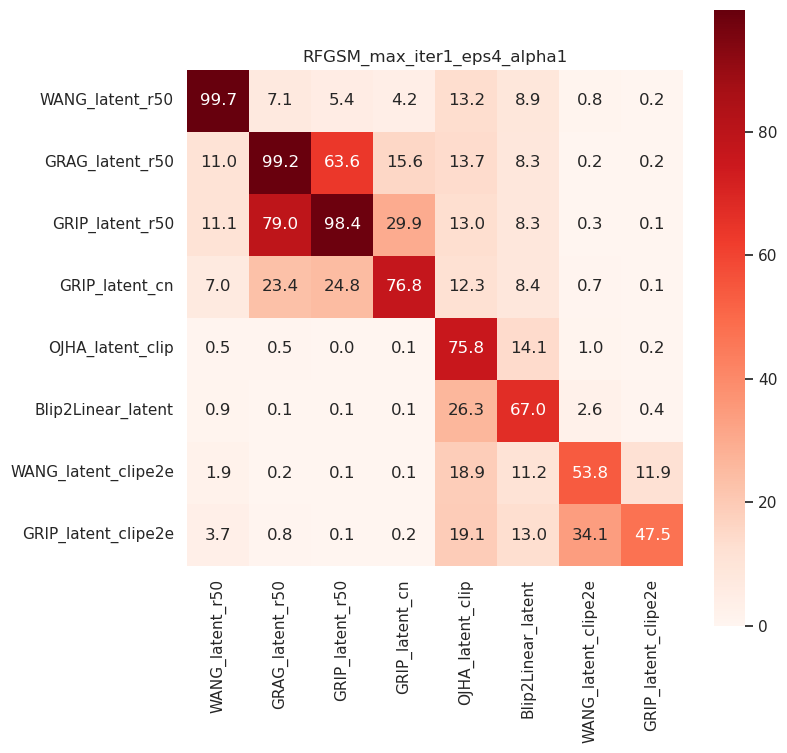

In [6]:
plot_heatmap(res_df, models)
plt.title(method_att)

# Residue FFT

In [2]:
fft_dir = './fft_images'
dataset = 'latent'
config = read_config(f'./configs/{dataset}.yaml')

attacks = config['attacks']
networks = config['networks']

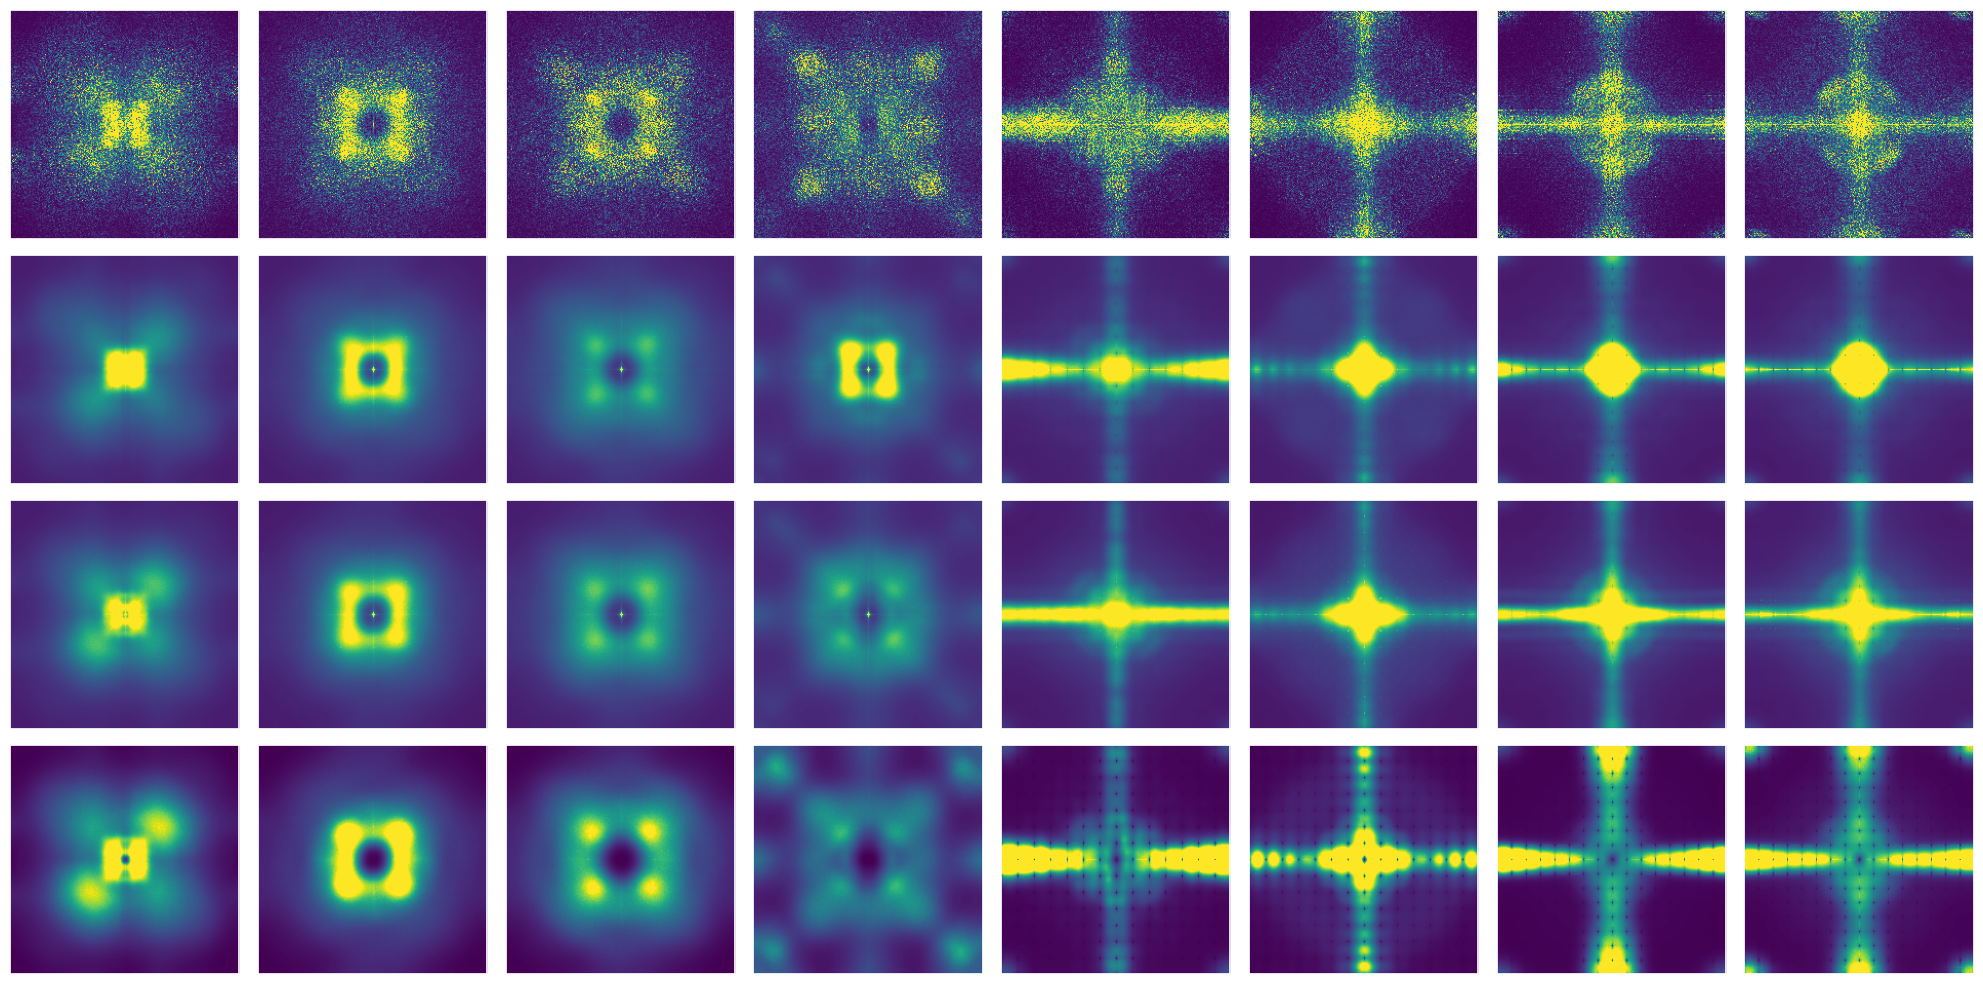

In [ ]:
fig, axes = plt.subplots(len(attacks), len(networks), figsize=(20, 10))

for i, attack in enumerate(attacks):
    for j, network in enumerate(networks):
        img_path = Path(fft_dir, dataset, get_atk_dir_name(**attack), f'{network["name"]}_ffte.png')
        if img_path.exists():
            img = Image.open(img_path)
            axes[i, j].imshow(img)
        
        if i == 0:
            axes[i, j].set_title(network['name'])
        if j == 0:
            axes[i, j].set_ylabel(attack['name'])

        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
#plt.savefig("fft.svg", format="svg")
plt.show()

In [4]:
plt.savefig("test.svg", format="svg")

<Figure size 640x480 with 0 Axes>